In [32]:
import pandas as pd

#data encoding
from sklearn.preprocessing import LabelEncoder

#model training
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

#model saving
import joblib

#visualization
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
df = pd.read_csv('concat_data.csv', index_col=0)


In [4]:
selected_df = df.drop(['model', 'state', 'Coast'], axis=1)

In [5]:
selected_df

,price,year,manufacturer,odometer,posting_year,Annual % Change
0,33590,2014,gmc,57923.0,2021,2.2878
1,22590,2010,chevrolet,71229.0,2021,2.7089
2,39590,2020,chevrolet,19160.0,2021,-2.7678
3,30990,2017,toyota,41124.0,2021,2.2419
4,15000,2013,ford,128000.0,2021,1.8419
...,...,...,...,...,...,...
399878,23590,2019,nissan,32226.0,2021,2.2944
399879,30590,2020,volvo,12029.0,2021,-2.7678
399880,34990,2020,cadillac,4174.0,2021,-2.7678
399881,28990,2018,lexus,30112.0,2021,2.9454


In [6]:
# Perform label encoding
label_encoder = LabelEncoder()
selected_df['manufacturer'] = label_encoder.fit_transform(df['manufacturer'])

In [7]:
# Display the matching labels
encoded_labels = selected_df['manufacturer'].unique()
matching_labels = label_encoder.inverse_transform(encoded_labels)
print(matching_labels)

['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'ferrari'
 'mini' 'pontiac' 'fiat' 'rover' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'aston-martin' 'land rover']


In [8]:
selected_df

,price,year,manufacturer,odometer,posting_year,Annual % Change
0,33590,2014,13,57923.0,2021,2.2878
1,22590,2010,7,71229.0,2021,2.7089
2,39590,2020,7,19160.0,2021,-2.7678
3,30990,2017,37,41124.0,2021,2.2419
4,15000,2013,12,128000.0,2021,1.8419
...,...,...,...,...,...,...
399878,23590,2019,29,32226.0,2021,2.2944
399879,30590,2020,39,12029.0,2021,-2.7678
399880,34990,2020,6,4174.0,2021,-2.7678
399881,28990,2018,22,30112.0,2021,2.9454


In [9]:
selected_df['car_age'] = selected_df['posting_year'] - selected_df['year']
selected_df = selected_df.drop(['year', 'posting_year'], axis=1)

Pearson Correlation

In [10]:
# Calculate the Pearson correlation coefficient
correlation = selected_df.corr()

# Display the correlation matrix
print(correlation)

                    price  manufacturer  odometer  Annual % Change   car_age
price            1.000000     -0.058865 -0.559712        -0.086610 -0.632206
manufacturer    -0.058865      1.000000  0.022619         0.006480  0.023667
odometer        -0.559712      0.022619  1.000000         0.094527  0.681775
Annual % Change -0.086610      0.006480  0.094527         1.000000  0.131402
car_age         -0.632206      0.023667  0.681775         0.131402  1.000000


In [11]:
# Split the data into features (X) and target variable (y)
X = selected_df.drop('price', axis=1)  # Features
y = selected_df['price']  # Target variable

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Regressor

In [46]:
# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 40799998.35527572
R^2 Score: 0.7955668881217501


In [49]:
# Save the trained model to a file
joblib.dump(model, 'model.pkl')

['model.pkl']

Feature Importance

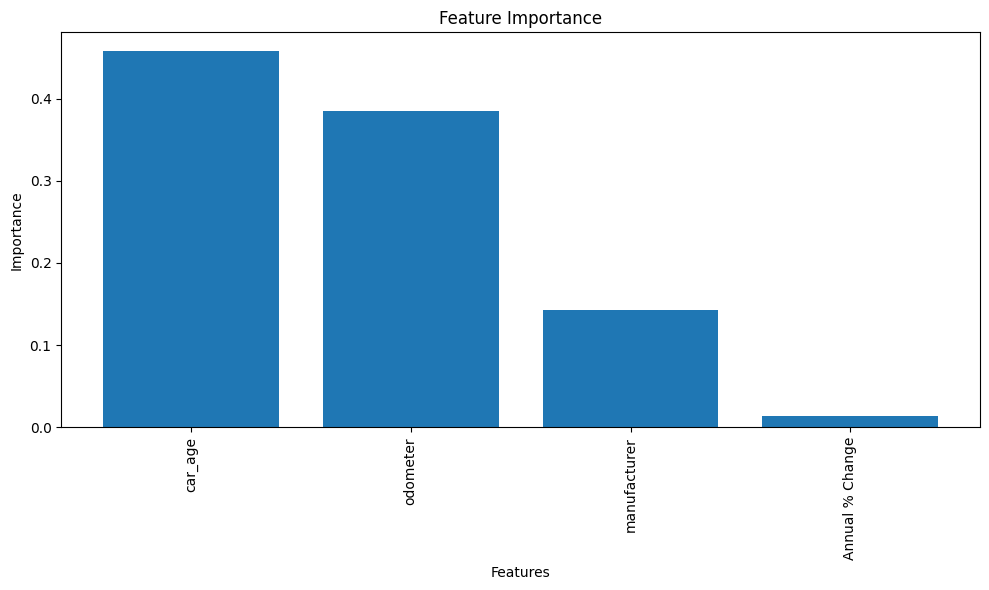

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Decision Tree

In [ ]:
# Visualize an individual decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model.estimators_[0], feature_names=feature_names, filled=True)
plt.show()

#### Linear Regression

In [13]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 113003651.75703883
R^2 Score: 0.433782129569368


In [15]:
# Save the trained model to a file
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

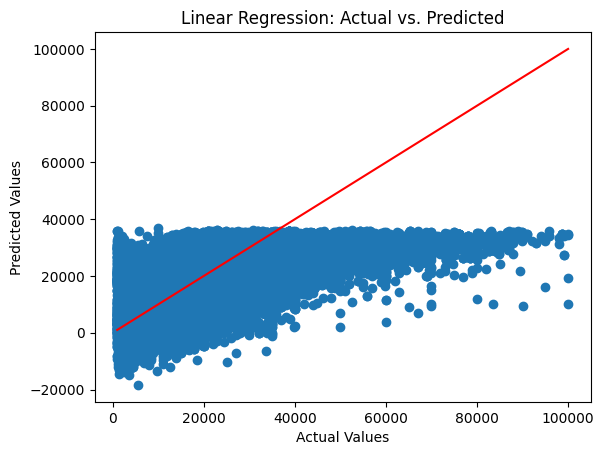

In [17]:
import numpy as np

# Add a line of best fit
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(min(y_test), max(y_test)), np.linspace(min(y_test), max(y_test)), color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

#### Result

Random Forest Regressor

In [34]:
with open('random_forest_model.pkl', 'rb') as file:
    rf_model = joblib.load(file)

y_pred = rf_model.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
var_score = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('Explained Variance Score:', var_score)

Mean Squared Error: 40799998.35527572
R^2 Score: 0.7955668881217501
Explained Variance Score: 0.7956721571649925


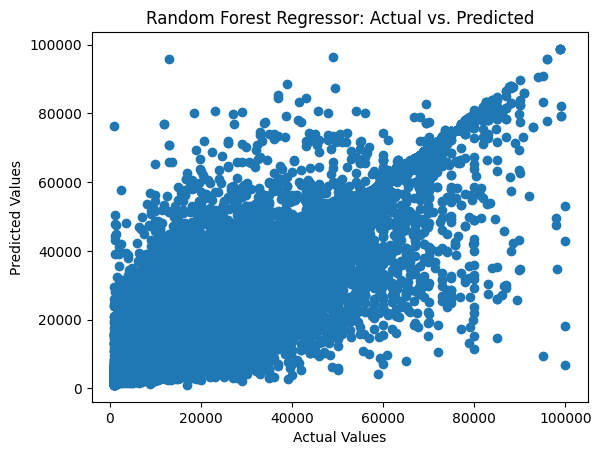

In [36]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs. Predicted')
plt.show()

Linear Regression

In [37]:
with open('linear_regression_model.pkl', 'rb') as file:
    lr_model = joblib.load(file)
y_pred = lr_model.predict(X_test)

In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
var_score = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('Explained Variance Score:', var_score)

Mean Squared Error: 113003651.75703883
R^2 Score: 0.433782129569368
Explained Variance Score: 0.4337958720502383


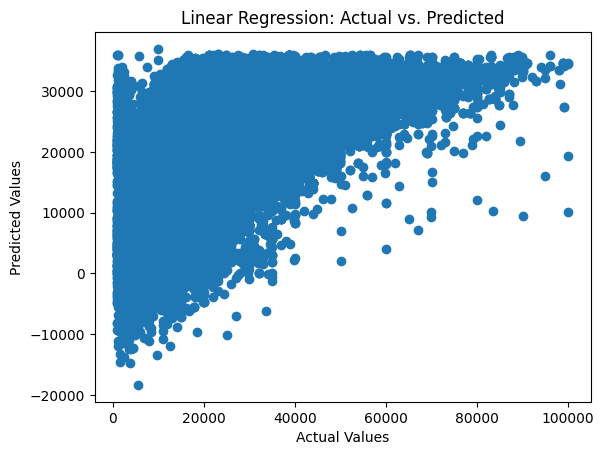

In [39]:
y_pred = lr_model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()